In [ ]:
problem statement : Analyzing the price of the car based on some important input features
(brand,no of doors,capacity,fueltype,milage,no of cylinders)

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [2]:
df = pd.read_csv(r"C:\Users\CHARISHMA\Downloads\car_df_EDA.csv")

In [3]:
df.head()#first five rows of columns

,Unnamed: 0.1,Unnamed: 0,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,dohc,four,130.0,mpfi,9.0,111,5000,21,27,13495
1,1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,dohc,four,130.0,mpfi,9.0,111,5000,21,27,16500
2,2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,ohcv,six,152.0,mpfi,9.0,154,5000,19,26,16500
3,3,4,audi,gas,std,four,sedan,fwd,front,99.8,...,ohc,four,109.0,mpfi,10.0,102,5500,24,30,13950
4,4,5,audi,gas,std,four,sedan,4wd,front,99.4,...,ohc,five,136.0,mpfi,8.0,115,5500,18,22,17450


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       208 non-null    int64  
 1   Unnamed: 0         208 non-null    int64  
 2   make               208 non-null    object 
 3   fuel_type          208 non-null    object 
 4   aspiration         208 non-null    object 
 5   num_of_doors       208 non-null    object 
 6   body_style         208 non-null    object 
 7   drive_wheels       208 non-null    object 
 8   engine_location    208 non-null    object 
 9   wheel_base         206 non-null    float64
 10  length             208 non-null    float64
 11  width              208 non-null    float64
 12  height             208 non-null    float64
 13  curb_weight        208 non-null    int64  
 14  engine_type        207 non-null    object 
 15  num_of_cylinders   208 non-null    object 
 16  engine_size        206 non

In [5]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,208.000000,208.000000,206.000000,208.000000,208.000000,208.000000,208.000000,206.000000,208.000000,208.000000,208.000000
mean,103.456731,104.456731,98.919903,174.262019,65.950962,53.750481,2563.375000,127.543689,10.194808,25.158654,30.668269
std,60.115573,60.115573,6.121266,12.373790,2.159419,2.435010,521.034018,41.599197,4.044135,6.528187,6.873639
min,0.000000,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,51.750000,52.750000,94.500000,166.675000,64.100000,52.000000,2163.000000,98.000000,8.600000,19.000000,25.000000
50%,103.500000,104.500000,97.000000,173.200000,65.500000,54.100000,2422.500000,120.000000,9.000000,24.000000,30.000000
75%,155.250000,156.250000,102.400000,183.775000,66.900000,55.500000,2959.250000,145.000000,9.400000,30.000000,34.000000
max,204.000000,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


## Data cleaning

### Duplicate values

In [7]:
df.duplicated().sum()

3

In [8]:
df[df.duplicated()]

,Unnamed: 0.1,Unnamed: 0,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
205,202,203,volvo,gas,std,four,sedan,rwd,front,109.1,...,ohcv,six,173.0,mpfi,8.8,134,5500,18,23,21485
206,203,204,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,ohc,six,145.0,idi,23.0,106,4800,26,27,NaN
207,204,205,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,ohc,four,141.0,mpfi,9.5,114,5400,19,25,22625


In [9]:
df.drop_duplicates(keep='first',inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.drop(['Unnamed: 0.1','Unnamed: 0'],axis = 1,inplace = True) #removing the columns that  are not contributing any information for analysis

In [12]:
df

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,dohc,four,130.0,mpfi,9.0,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,dohc,four,130.0,mpfi,9.0,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,ohcv,six,152.0,mpfi,9.0,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,ohc,four,109.0,mpfi,10.0,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,ohc,five,136.0,mpfi,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,ohc,four,141.0,mpfi,9.5,114,5400,23,28,16845
201,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,ohc,four,141.0,mpfi,8.7,160,5300,19,25,19045
202,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,ohcv,six,173.0,mpfi,8.8,134,5500,18,23,21485
203,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,ohc,six,145.0,idi,23.0,106,4800,26,27,NaN


### Structural errors

In [13]:
df.columns

Index(['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style',
       'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'compression_ratio', 'horsepower',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [14]:
df['make'].dtype #checking the type of variable make

dtype('O')

In [15]:
df['make'].unique() #checking the structural errors in make

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [16]:
df['fuel_type'].dtype #checking the type of variable fuel_type

dtype('O')

In [17]:
df['fuel_type'].unique() #checking the structural errors in fuel_type

array(['gas', 'diesel'], dtype=object)

In [ ]:
df['aspiration'].dtype #checking the type of variable aspiration

In [18]:
df['aspiration'].unique() #checking the structural errors in aspiration

array(['std', 'turbo'], dtype=object)

In [19]:
df['num_of_doors'].dtype #checking the type of variable num_of_doors

dtype('O')

In [20]:
df['num_of_doors'].unique() #checking the structural errors in num_of_doors

array(['two', 'four', '?'], dtype=object)

In [22]:
def doors(n):
    if n=='two':
        return 2
    elif n=='four':
        return 4
    else:
        return np.nan

In [23]:
df['num_of_doors']=df['num_of_doors'].apply(doors)

In [24]:
df['num_of_doors'].unique()

array([ 2.,  4., nan])

In [25]:
df['body_style'].dtype #checking the type of variable body_style

dtype('O')

In [26]:
df['body_style'].unique() #checking the structural errors in body_style

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [27]:
df['drive_wheels'].dtype #checking the type of variable 'drive_wheels'

dtype('O')

In [28]:
df['drive_wheels'].unique() #checking the structural errors in 'drive_wheels'

array(['rwd', 'fwd', '4wd'], dtype=object)

In [29]:
df['engine_location'].dtype #checking the type of variable 'engine_location'

dtype('O')

In [30]:
df['engine_location'].unique() #checking the structural errors in 'engine_location'

array(['front', 'rear'], dtype=object)

In [31]:
df['wheel_base'].dtype #checking the type of variable 'wheel_base'

dtype('float64')

In [32]:
df['wheel_base'].unique() #checking the structural errors in 'wheel_base'

array([ 88.6,  94.5,  99.8,  99.4, 105.8,  99.5, 101.2,   nan, 103.5,
       110. ,  88.4,  93.7, 103.3,  95.9,  86.6,  96.5,  94.3,  96. ,
       113. , 102. ,  93.1,  95.3,  98.8, 104.9, 106.7, 115.6,  96.6,
       120.9, 112. , 102.7,  93. ,  96.3,  95.1,  97.2, 100.4,  91.3,
        99.2, 107.9, 114.2, 108. ,  89.5,  98.4,  96.1,  99.1,  93.3,
        97. ,  96.9,  95.7, 102.4, 102.9, 104.5,  97.3, 104.3, 109.1])

In [33]:
df['length'].dtype #checking the type of variable 'length'

dtype('float64')

In [34]:
df['length'].unique() #checking the structural errors in 'length'

array([168.8, 171.2, 176.6, 177.3, 192.7, 178.2, 176.8, 189. , 193.8,
       197. , 141.1, 155.9, 158.8, 157.3, 174.6, 173.2, 144.6, 150. ,
       163.4, 157.1, 167.5, 175.4, 169.1, 170.7, 172.6, 199.6, 191.7,
       159.1, 166.8, 169. , 177.8, 175. , 190.9, 187.5, 202.6, 180.3,
       208.1, 199.2, 178.4, 173. , 172.4, 165.3, 170.2, 165.6, 162.4,
       173.4, 181.7, 184.6, 178.5, 186.7, 198.9, 167.3, 168.9, 175.7,
       181.5, 186.6, 156.9, 157.9, 172. , 173.5, 173.6, 158.7, 169.7,
       166.3, 168.7, 176.2, 175.6, 183.5, 187.8, 171.7, 159.3, 165.7,
       180.2, 183.1, 188.8])

In [35]:
df['width'].dtype #checking the type of variable 'width'

dtype('float64')

In [36]:
df['width'].unique() #checking the structural errors in 'width'

array([64.1, 65.5, 66.2, 66.4, 66.3, 71.4, 67.9, 64.8, 66.9, 70.9, 60.3,
       63.6, 63.8, 64.6, 63.9, 64. , 65.2, 62.5, 66. , 61.8, 69.6, 70.6,
       64.2, 65.7, 66.5, 66.1, 70.3, 71.7, 70.5, 72. , 68. , 64.4, 65.4,
       68.4, 68.3, 65. , 72.3, 66.6, 63.4, 65.6, 67.7, 67.2, 68.9, 68.8])

In [37]:
df['height'].dtype #checking the type of variable 'height'

dtype('float64')

In [38]:
df['height'].unique() #checking the structural errors in 'height'

array([48.8, 52.4, 54.3, 53.1, 55.7, 55.9, 52. , 53.7, 56.3, 53.2, 50.8,
       50.6, 59.8, 50.2, 52.6, 54.5, 58.3, 53.3, 54.1, 51. , 53.5, 51.4,
       52.8, 47.8, 49.6, 55.5, 54.4, 56.5, 58.7, 54.9, 56.7, 55.4, 54.8,
       49.4, 51.6, 54.7, 55.1, 56.1, 49.7, 56. , 50.5, 55.2, 52.5, 53. ,
       59.1, 53.9, 55.6, 56.2, 57.5])

In [39]:
df['curb_weight'].dtype #checking the type of variable 'curb_weight'

dtype('int64')

In [40]:
df['curb_weight'].unique() #checking the structural errors in 'curb_weight'

array([2548, 2823, 2337, 2824, 2507, 2844, 2954, 3086, 3053, 2395, 2710,
       2765, 3055, 3230, 3380, 3505, 1488, 1874, 1909, 1876, 2128, 1967,
       1989, 2191, 2535, 2811, 1713, 1819, 1837, 1940, 1956, 2010, 2024,
       2236, 2289, 2304, 2372, 2465, 2293, 2734, 4066, 3950, 1890, 1900,
       1905, 1945, 1950, 2380, 2385, 2500, 2410, 2443, 2425, 2670, 2700,
       3515, 3750, 3495, 3770, 3740, 3685, 3900, 3715, 2910, 1918, 1944,
       2004, 2145, 2370, 2328, 2833, 2921, 2926, 2365, 2405, 2403, 1889,
       2017, 1938, 1951, 2028, 1971, 2037, 2008, 2324, 2302, 3095, 3296,
       3060, 3071, 3139, 3020, 3197, 3430, 3075, 3252, 3285, 3485, 3130,
       2818, 2778, 2756, 2800, 3366, 2579, 2460, 2658, 2695, 2707, 2758,
       2808, 2847, 2050, 2120, 2240, 2190, 2340, 2510, 2290, 2455, 2420,
       2650, 1985, 2040, 2015, 2280, 3110, 2081, 2109, 2275, 2094, 2122,
       2140, 2169, 2204, 2265, 2300, 2540, 2536, 2551, 2679, 2714, 2975,
       2326, 2480, 2414, 2458, 2976, 3016, 3131, 31

In [41]:
df['engine_type'].dtype #checking the type of variable 'engine_type'

dtype('O')

In [42]:
df['engine_type'].unique() #checking the structural errors in 'engine_type'

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', nan, 'ohcf', 'dohcv'],
      dtype=object)

In [43]:
df['num_of_cylinders'].dtype #checking the type of variable 'num_of_cylinders'

dtype('O')

In [44]:
df['num_of_cylinders'].unique() #checking the structural errors in 'num_of_cylinders'

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [45]:
def cylinder(n):
    if n=='two':
        return 2
    elif n=='three':
        return 3
    elif n=='four':
        return 4
    elif n=='five':
        return 5
    elif n=='six':
        return 6
    elif n=='eight':
        return 8
    else:
        return 12

In [46]:
df['num_of_cylinders']=df['num_of_cylinders'].apply(cylinder)

In [47]:
df['num_of_cylinders'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [48]:
df['num_of_cylinders'].dtype

dtype('int64')

In [49]:
df['engine_size'].dtype #checking the type of variable 'engine_size'

dtype('float64')

In [50]:
df['engine_size'].unique() #checking the structural errors in 'engine_size'

array([130., 152., 109., 136., 131., 108., 164., 209.,  61.,  90.,  98.,
       122., 156.,  92.,  79., 110.,  nan, 111., 119., 258., 326.,  91.,
        70.,  80., 140., 134., 183., 234., 308., 304.,  97., 103., 120.,
       181., 151., 194., 203., 132., 121., 146., 171., 161., 141., 173.,
       145.])

In [51]:
df['fuel_system'].dtype #checking the type of variable 'fuel_system'

dtype('O')

In [52]:
df['fuel_system'].unique() #checking the structural errors in 'fuel_system'

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [53]:
df['compression_ratio'].dtype #checking the type of variable 'compression_ratio'

dtype('float64')

In [54]:
df['compression_ratio'].unique() #checking the structural errors in 'compression_ratio'

array([ 9.  , 10.  ,  8.  ,  8.5 ,  8.3 ,  7.  ,  8.8 ,  9.5 ,  9.6 ,
        9.41,  9.4 ,  7.6 ,  9.2 , 10.1 ,  9.1 ,  8.1 , 11.5 ,  8.6 ,
       22.7 , 22.  , 21.5 ,  7.5 , 21.9 ,  7.8 ,  8.4 , 21.  ,  8.7 ,
        9.31,  9.3 ,  7.7 , 22.5 , 23.  ])

In [55]:
df['horsepower'].dtype #checking the type of variable 'length'

dtype('O')

In [56]:
df['horsepower'].unique() #checking the structural errors in 'compression_ratio'

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [57]:
df['horsepower']=df['horsepower'].replace('?',np.nan)

In [58]:
df['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', nan, '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [59]:
df['peak_rpm'].dtype #checking the type of variable 'peak_rpm'

dtype('O')

In [60]:
df['peak_rpm'].unique() #checking the structural errors in 'peak_rpm'

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', '?', '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

In [61]:
df['peak_rpm']=df['peak_rpm'].replace('?',np.nan)

In [62]:
df['peak_rpm'].unique() 

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', nan, '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

In [63]:
df['city_mpg'].dtype #checking the type of variable 'compression_ratio'

dtype('int64')

In [64]:
df['city_mpg'].unique() #checking the structural errors in 'compression_ratio'

array([21, 19, 24, 18, 17, 16, 23, 20, 15, 47, 38, 37, 31, 49, 30, 27, 25,
       13, 26, 36, 22, 14, 45, 28, 32, 35, 34, 29, 33], dtype=int64)

In [65]:
df['highway_mpg'].dtype#checking the type of variable 'highway_mpg'

dtype('int64')

In [66]:
df['highway_mpg'].unique() #checking the structural errors in 'highway_mpg'

array([27, 26, 30, 22, 25, 20, 29, 28, 53, 43, 41, 38, 24, 54, 42, 34, 33,
       31, 19, 17, 23, 32, 39, 18, 16, 37, 50, 36, 47, 46], dtype=int64)

In [67]:
df['price'].dtype#checking the type of variable 'price'

dtype('O')

In [68]:
df['price'].unique() #checking the structural errors in 'price'

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '?', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', nan, '35550', '36000', '5195',
       '6095', '6795', '6695', '7395', '10945', '11845', '13645', '15645',
       '8495', '10595', '10245', '10795', '11245', '18280', '18344',
       '25552', '28248', '28176', '31600', '34184', '35056', '40960',
       '45400', '16503', '5389', '6189', '6669', '7689', '9959', '8499',
       '12629', '14869', '14489', '6989', '8189', '9279', '5499', '7099',
       '6649', '6849', '7349', '7299', '7799', '7499', '7999', '8249',
       '8949', '9549', '13499', '14399', '17199', '19699', '18399',
       '11900', '13200', '12440', '13860', '15580', '16695', '170

In [69]:
df['price']=df['price'].replace('?',np.nan)

In [70]:
df['price'].unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', nan, '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '35550', '36000', '5195',
       '6095', '6795', '6695', '7395', '10945', '11845', '13645', '15645',
       '8495', '10595', '10245', '10795', '11245', '18280', '18344',
       '25552', '28248', '28176', '31600', '34184', '35056', '40960',
       '45400', '16503', '5389', '6189', '6669', '7689', '9959', '8499',
       '12629', '14869', '14489', '6989', '8189', '9279', '5499', '7099',
       '6649', '6849', '7349', '7299', '7799', '7499', '7999', '8249',
       '8949', '9549', '13499', '14399', '17199', '19699', '18399',
       '11900', '13200', '12440', '13860', '15580', '16695', '17075',


### Missing values

In [71]:
df.isna().sum()

make                 0
fuel_type            0
aspiration           0
num_of_doors         2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           2
length               0
width                0
height               0
curb_weight          0
engine_type          1
num_of_cylinders     0
engine_size          2
fuel_system          0
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                7
dtype: int64

In [72]:
df['num_of_doors'].fillna(df['num_of_doors'].mode()[0],inplace=True)#no.of.doors must be int not 2.5 so mode
df['wheel_base'].fillna(df['wheel_base'].mean(),inplace=True)
df['engine_type'].fillna(df['engine_type'].mode()[0],inplace=True)
df['engine_size'].fillna(df['engine_size'].median(),inplace=True)
df['horsepower'].fillna(df['horsepower'].median(),inplace=True)
df['peak_rpm'].fillna(df['peak_rpm'].median(),inplace=True)
df['price'].fillna(df['price'].median(),inplace=True)

In [73]:
df.isna().sum()

make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

### outliers

In [74]:
df[(df["num_of_doors"] < 2)|(df["num_of_doors"] > 4)] #num_of_doors

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [75]:
df[(df["num_of_cylinders"] < 2)|(df["num_of_cylinders"] > 12)] #num_of_cylinders

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [76]:
Q1 = df["engine_size"].quantile(0.25)   #engine_size
Q3 = df["engine_size"].quantile(0.75)
IQR = Q3 - Q1
Lower = Q1-(1.5*IQR)
Upper = Q3+(1.5*IQR)

In [77]:
Lower

33.5

In [78]:
Upper

205.5

In [79]:
c1 = (df["engine_size"]<Lower) | (df["engine_size"]<Lower)  # finding outliers

In [80]:
df["engine_size"].where(c1,df["engine_size"].mean(),inplace = True)  # replacing outilers with mean

In [81]:
Q1 = df["compression_ratio"].quantile(0.25)   # compression_ratio
Q3 = df["compression_ratio"].quantile(0.75)
IQR = Q3 - Q1
Lower = Q1 - (1.5*IQR)
Upper = Q3 + (1.5*IQR)

In [82]:
Lower

7.399999999999999

In [83]:
Upper

10.600000000000001

In [89]:
c2 = (df["compression_ratio"]<Lower) | (df["compression_ratio"]>Upper)  # finding outliers

In [90]:
df["compression_ratio"].where(c2,df["compression_ratio"].mean(),inplace = True)  # replacing outilers with mean

In [86]:
Q1 = df["city_mpg"].quantile(0.25)   # city_mpg
Q3 = df["city_mpg"].quantile(0.75)
IQR = Q3 - Q1
Lower = Q1 - (1.5*IQR)
Upper = Q3 + (1.5*IQR)

In [88]:
Lower

2.5

In [87]:
Upper

46.5

In [91]:
c3 = (df["city_mpg"]<Lower) |  (df["city_mpg"]>Upper) # finding the outliers

In [92]:
df["city_mpg"].where(c3,df["city_mpg"].mean(),inplace = True)  # replacing outilers with mean

In [93]:
Q1 = df["highway_mpg"].quantile(0.25)   # highway_mpg
Q3 = df["highway_mpg"].quantile(0.75)
IQR = Q3 - Q1
Lower = Q1 - (1.5*IQR)
Upper = Q3 + (1.5*IQR)

In [94]:
Lower

11.5

In [95]:
Upper

47.5

In [96]:
c4 = (df["highway_mpg"]<Lower) |  (df["highway_mpg"]>Upper) # finding outliers

In [97]:
df["highway_mpg"].where(c4,df["highway_mpg"].mean(),inplace = True)  # replacing the outilers with mean

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 0 to 204
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               205 non-null    object 
 1   fuel_type          205 non-null    object 
 2   aspiration         205 non-null    object 
 3   num_of_doors       205 non-null    float64
 4   body_style         205 non-null    object 
 5   drive_wheels       205 non-null    object 
 6   engine_location    205 non-null    object 
 7   wheel_base         205 non-null    float64
 8   length             205 non-null    float64
 9   width              205 non-null    float64
 10  height             205 non-null    float64
 11  curb_weight        205 non-null    int64  
 12  engine_type        205 non-null    object 
 13  num_of_cylinders   205 non-null    int64  
 14  engine_size        205 non-null    float64
 15  fuel_system        205 non-null    object 
 16  compression_ratio  205 non-null

### Type casting

In [99]:
df["price"] = df["price"].astype("int64")
df["peak_rpm"] = df["peak_rpm"].astype("int64")
df["horsepower"] = df["horsepower"].astype("int64")

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 0 to 204
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               205 non-null    object 
 1   fuel_type          205 non-null    object 
 2   aspiration         205 non-null    object 
 3   num_of_doors       205 non-null    float64
 4   body_style         205 non-null    object 
 5   drive_wheels       205 non-null    object 
 6   engine_location    205 non-null    object 
 7   wheel_base         205 non-null    float64
 8   length             205 non-null    float64
 9   width              205 non-null    float64
 10  height             205 non-null    float64
 11  curb_weight        205 non-null    int64  
 12  engine_type        205 non-null    object 
 13  num_of_cylinders   205 non-null    int64  
 14  engine_size        205 non-null    float64
 15  fuel_system        205 non-null    object 
 16  compression_ratio  205 non-null

### Univariate analysis

## Histograms

#### num_of_cylinders

In [102]:
plt.style.use('ggplot')

<Axes: title={'center': 'Histogram of No of cylinders'}, xlabel='No of Cylinders', ylabel='Frequency'>

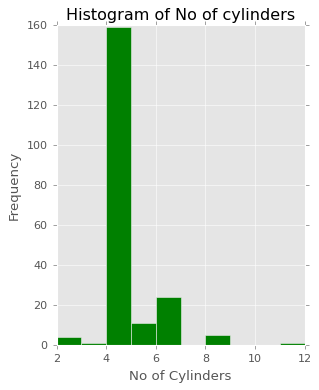

In [103]:
df['num_of_cylinders'].plot(kind='hist',
                           xlabel='No of Cylinders',
                           title='Histogram of No of cylinders',
                           color='green',
                           figsize=(4,5))

#### wheel base

In [105]:
plt.style.use('classic')

<Axes: title={'center': 'Histogram of wheel base'}, xlabel='wheel base', ylabel='Frequency'>

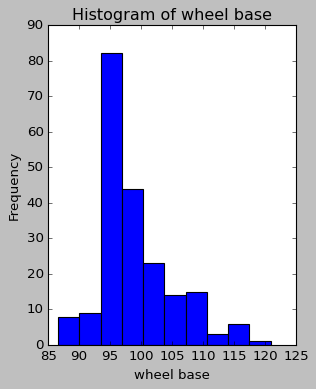

In [106]:
df['wheel_base'].plot(kind='hist',
                           xlabel='wheel base',
                           title='Histogram of wheel base',
                           color='blue',
                           figsize=(4,5))

#### curb_weight

In [107]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [108]:
plt.style.use('fast')

<Axes: title={'center': 'Histogram of curbweight'}, xlabel='curb weight', ylabel='Frequency'>

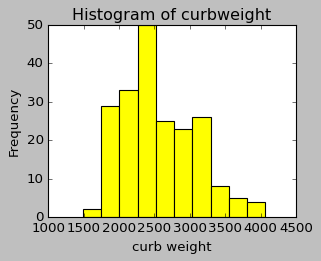

In [109]:
df['curb_weight'].plot(kind='hist',
                           xlabel='curb weight',
                           title='Histogram of curbweight',
                           color='yellow',
                           figsize=(4,3))

#### horsepower  

In [110]:
plt.style.use('grayscale')

<Axes: title={'center': 'Histogram of horsepower'}, xlabel='horsepower', ylabel='Frequency'>

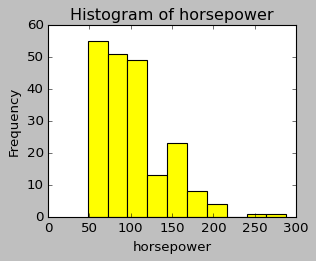

In [111]:
df['horsepower'].plot(kind='hist',
                           xlabel='horsepower',
                           title='Histogram of horsepower',
                           color='yellow',
                           figsize=(4,3))